# Cleaning and Concatenating Datasets

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

### Bank Rate.csv Cleaning 

In [4]:
brate = pd.read_csv("Bank Rate.csv")

#Reversing the order
brate = brate.iloc[::-1].reset_index(drop = True)

#Dropping the date values while keeping the month and year values
brate.rename(columns={"Date Changed": "Date"}, inplace=True)
brate["Date"] = pd.to_datetime(brate["Date"], format="%d-%b-%y").dt.strftime('%Y%m')

#Grouping them by year and month and averaging the values
brate = brate.groupby(by = ["Date"]).mean()

#Removing Date column from the index and convert the inputs into integers
brate = brate.reset_index()
brate["Date"] = brate["Date"].astype(int)

#Creating a list of numbers from the minumum value of date to maximum value of date
all_dates = pd.Series(range(brate['Date'].min(), brate['Date'].max() + 1))

# Filter to keep only valid month values (ignoring months like 197513)
all_dates = all_dates[(all_dates % 100 >= 1) & (all_dates % 100 <= 12)]

# Reindex the dataframe to include all dates, with forward-fill for missing 'Rate' values
brate = brate.set_index('Date').reindex(all_dates).ffill().reset_index()

# Rename columns as necessary
brate.columns = ['Date', 'Rate']

# Set 'Date' as index
brate = brate.set_index("Date")  

# Drop rows where the index is in the range 197501 to 199912
brate = brate.drop(brate.index[(brate.index >= 197501) & (brate.index <= 199912)])
brate.tail()

brate.head()

,Rate
Date,
200001,5.75
200002,6.00
200003,6.00
200004,6.00
200005,6.00


In [5]:
# Adding last value of Bank rate manually
brate = brate.reset_index()

new_row = {"Rate": 5, "Date":202409}
brate.loc[len(brate)] = new_row

brate = brate.set_index(brate["Date"])
brate.tail()

,Date,Rate
Date,,
202405,202405,5.25
202406,202406,5.25
202407,202407,5.25
202408,202408,5.00
202409,202409,5.00


## Exchange Rate.csv Cleaning

In [7]:
erate = pd.read_csv("Exchange Rate.csv")

#Reversing the order
erate = erate.iloc[::-1].reset_index(drop = True)

#Dropping the date values while keeping the month and year values
erate["Date"] = pd.to_datetime(erate["Date"], format="%d-%b-%y").dt.strftime('%Y%m').astype(int)

#Grouping them by year and month and averaging the values
erate = erate.groupby(by = ["Date"]).mean()

#Changing column heading to Xrate
erate.rename(columns = {"Spot exchange rate, US $ into Sterling  " : "Xrate"}, inplace = True)

erate.head()

,Xrate
Date,
200001,1.640185
200002,1.599814
200003,1.580222
200004,1.583694
200005,1.507538


## GDP Index.csv

In [9]:
gdp = pd.read_csv("GDP index.csv")

gdp.head()

,Date,GDP index
0,1955 Q1,21.4
1,1955 Q2,21.4
2,1955 Q3,21.8
3,1955 Q4,21.7
4,1956 Q1,21.9


In [10]:
#Converting Quarters into Months and copying same values of quarters into the three included months
#Define the mapping of quarters to months
quarter_to_months = np.array([
    ["Jan", "Feb", "Mar"], 
    ["Apr", "May", "Jun"], 
    ["Jul", "Aug", "Sep"], 
    ["Oct", "Nov", "Dec"]
])

#Extract years and quarters from the data
years = gdp['Date'].str[:4].values.astype(str)  # Extract and convert the year part
quarters = gdp['Date'].str[5:].values.astype(str)  # Extract and convert the quarter part

#Map quarters to corresponding months and repeat GDP values
expanded_years = np.repeat(years, 3)
expanded_months = quarter_to_months[
    np.searchsorted(["Q1", "Q2", "Q3", "Q4"], quarters)  # Map quarter to index
].flatten()
expanded_gdp = np.repeat(gdp['GDP index'], 3)

#Combine months and years into a single Date column
expanded_dates = np.core.defchararray.add(expanded_months, " ")  # Add a space after months
expanded_dates = np.core.defchararray.add(expanded_dates, expanded_years)  # Add years

#Create the expanded DataFrame
gdp = pd.DataFrame({"Date": expanded_dates, "GDP index": expanded_gdp})


gdp.head()

,Date,GDP index
0,Jan 1955,21.4
0,Feb 1955,21.4
0,Mar 1955,21.4
1,Apr 1955,21.4
1,May 1955,21.4


In [11]:
# Convert "Date" column to datetime in the format "%Y%m"
gdp["Date"] = pd.to_datetime(gdp["Date"], format="%b %Y").dt.strftime('%Y%m')

# Convert "Date" column to integer
gdp["Date"] = gdp["Date"].astype(int)

# Set "Date" column as the index
gdp = gdp.set_index("Date")

# Drop rows where the index is in the range 199801 to 199912
gdp = gdp.drop(gdp.index[(gdp.index >= 195501) & (gdp.index <= 199912)])

# Display the first few rows
gdp.head()

,GDP index
Date,
200001,70.4
200002,70.4
200003,70.4
200004,70.9
200005,70.9


## Projected GDP index.csv

In [13]:
future_gdp = pd.read_csv("Projected GDP index.csv")

future_gdp.head(20)

,Date,YoY Projected growth (%),Previous Year GDP index,Projected GDP index
0,2024 Q4,NaN,NaN,100.70
1,2025 Q1,1.7,100.70,102.41
2,2025 Q2,1.7,101.20,102.92
3,2025 Q3,1.7,101.30,103.02
4,2025 Q4,1.7,100.70,102.41
5,2026 Q1,1.3,102.41,103.74
6,2026 Q2,1.3,102.92,104.26
7,2026 Q3,1.3,103.02,104.36
8,2026 Q4,1.3,102.41,103.74


In [14]:
#Converting Quarters into Months and copying same values of quarters into the three included months
#Define the mapping of quarters to months
quarter_to_months = np.array([
    ["Jan", "Feb", "Mar"], 
    ["Apr", "May", "Jun"], 
    ["Jul", "Aug", "Sep"], 
    ["Oct", "Nov", "Dec"]
])

#Extract years and quarters from the data
years = future_gdp['Date'].str[:4].values.astype(str)  # Extract and convert the year part
quarters = future_gdp['Date'].str[5:].values.astype(str)  # Extract and convert the quarter part

#Map quarters to corresponding months and repeat GDP values
expanded_years = np.repeat(years, 3)
expanded_months = quarter_to_months[
    np.searchsorted(["Q1", "Q2", "Q3", "Q4"], quarters)  # Map quarter to index
].flatten()
expanded_gdp = np.repeat(future_gdp['Projected GDP index'], 3)

#Combine months and years into a single Date column
expanded_dates = np.core.defchararray.add(expanded_months, " ")  # Add a space after months
expanded_dates = np.core.defchararray.add(expanded_dates, expanded_years)  # Add years

#Create the expanded DataFrame
future_gdp = pd.DataFrame({"Date": expanded_dates, "Projected GDP index": expanded_gdp})


future_gdp.head()

,Date,Projected GDP index
0,Oct 2024,100.70
0,Nov 2024,100.70
0,Dec 2024,100.70
1,Jan 2025,102.41
1,Feb 2025,102.41


In [15]:
# Convert "Date" column to datetime in the format "%Y%m"
future_gdp["Date"] = pd.to_datetime(future_gdp["Date"], format="%b %Y").dt.strftime('%Y%m')

# Convert "Date" column to integer
future_gdp["Date"] = future_gdp["Date"].astype(int)

# Set "Date" column as the index
future_gdp = future_gdp.set_index("Date")

# adding another column for the Dates
future_gdp["Date 1"] = pd.to_datetime(future_gdp.index, format = "%Y%m")
future_gdp["Date 1"] = future_gdp["Date 1"].dt.strftime("%Y %b")

# Display the first few rows
future_gdp.head(30)

,Projected GDP index,Date 1
Date,,
202410,100.70,2024 Oct
202411,100.70,2024 Nov
202412,100.70,2024 Dec
202501,102.41,2025 Jan
202502,102.41,2025 Feb
202503,102.41,2025 Mar
202504,102.92,2025 Apr
202505,102.92,2025 May
202506,102.92,2025 Jun


## RSI CPSA.csv

In [17]:
#Opening the dataframe on pandas
rsi = pd.read_csv("RSI CPSA.csv")

# Changing Time Period to Date
rsi.rename(columns = {"Time Period" : "Date"}, inplace = True)

#Changing Date format
rsi["Date"] = pd.to_datetime(rsi["Date"], format="%Y %b").dt.strftime('%Y%m')
rsi["Date"] = rsi["Date"].astype(int)

#Putting Date as the index
rsi = rsi.set_index("Date")

# Drop rows where the index is in the range 199801 to 199912
rsi = rsi.drop(rsi.index[(rsi.index >= 198801) & (rsi.index <= 199912)])

rsi.head(25)

,All retail incl. fuel,All retail excl. fuel,food stores,non-food stores,Non-specialised stores,"Textile, clothing and footwear",Household goods stores,Other stores,Non-store retail,Automotive fuel
Date,,,,,,,,,,
200001,48.1,49.0,48.7,59.8,58.9,53.3,81.8,52.7,18.2,40.5
200002,47.3,48.1,48.3,58.0,57.8,51.9,76.7,52.0,18.6,40.5
200003,47.3,48.2,48.1,58.4,56.8,52.6,79.3,51.9,18.3,39.9
200004,48.4,48.4,48.9,58.1,57.1,53.2,77.2,51.5,18.2,49.0
200005,47.6,48.2,47.8,58.6,56.6,54.7,77.9,51.6,18.6,43.2
200006,47.8,48.4,48.4,58.8,56.7,53.7,78.3,52.7,17.9,43.0
200007,47.8,48.7,48.6,59.2,57.2,54.1,78.4,53.2,17.9,40.8
200008,48.1,49.0,49.1,59.5,57.0,54.6,78.9,53.4,18.2,41.1
200009,48.2,49.0,49.2,59.2,57.4,54.5,77.9,53.0,18.5,41.9


## covid.csv

In [19]:
covid = pd.read_csv("covid.csv")

covid.columns

Index(['Date', 'Cases '], dtype='object')

In [20]:
# Convert 'Date' column to datetime format
covid['Date'] = pd.to_datetime(covid['Date'], format='%b %d, %Y')

# Extract month and year in the desired format (e.g., 'Apr, 2020')
covid['Month_Year'] = covid['Date'].dt.strftime('%b, %Y')

# Ensure 'Cases' column is numeric
covid['Cases '] = pd.to_numeric(covid['Cases '], errors='coerce')

# Group by 'Month_Year' and sum the cases for each month
covid_month = covid.groupby('Month_Year')['Cases '].sum().reset_index()

# Convert 'Month_Year' back to a datetime object for sorting
covid_month['Month_Year'] = pd.to_datetime(covid_month['Month_Year'], format='%b, %Y')

# Sort by chronological order
covid_month = covid_month.sort_values(by='Month_Year')

# Convert 'Month_Year' back to the desired string format
covid_month['Month_Year'] = covid_month['Month_Year'].dt.strftime('%b, %Y')

# Display the result
covid_month.head()

,Month_Year,Cases
0,"Apr, 2020",50197.0
22,"May, 2020",87825.0
17,"Jun, 2020",29200.0
14,"Jul, 2020",20646.0
3,"Aug, 2020",33673.0


In [21]:

covid_month.rename(columns = {"Cases " : "Cases"}, inplace = True)
covid_month.rename(columns = {"Month_Year" : "Date"}, inplace = True)

#Changing Date format
covid_month["Date"] = pd.to_datetime(covid_month["Date"], format='%b, %Y').dt.strftime('%Y%m')
covid_month["Date"] = covid_month["Date"].astype(int)

#Putting Date as the index
covid_month = covid_month.set_index("Date")

covid_month.head()

,Cases
Date,
202004,50197.0
202005,87825.0
202006,29200.0
202007,20646.0
202008,33673.0


## Concatenating the Dataframes

In [23]:
concat_data = pd.concat([gdp, brate, erate, rsi, covid_month] ,axis = 1)

# adding another column for the Dates
concat_data["Date 1"] = pd.to_datetime(concat_data.index, format = "%Y%m")
concat_data["Date 1"] = concat_data["Date 1"].dt.strftime("%Y %b")

concat_data.tail()

,GDP index,Date,Rate,Xrate,All retail incl. fuel,All retail excl. fuel,food stores,non-food stores,Non-specialised stores,"Textile, clothing and footwear",Household goods stores,Other stores,Non-store retail,Automotive fuel,Cases,Date 1
Date,,,,,,,,,,,,,,,,
202405,101.2,202405,5.25,1.263448,105.7,107.7,110.2,104.9,105.4,107.6,96.0,107.5,108.7,89.4,NaN,2024 May
202406,101.2,202406,5.25,1.271025,104.5,106.5,109.7,102.7,102.5,105.2,93.4,106.3,108.6,88.6,NaN,2024 Jun
202407,101.3,202407,5.25,1.286291,105.5,107.8,110.0,104.9,108.2,106.5,94.4,108.1,109.7,87.4,NaN,2024 Jul
202408,101.3,202408,5.00,1.293286,106.1,108.6,111.8,105.3,108.2,108.6,94.9,107.1,109.1,86.2,NaN,2024 Aug
202409,101.3,202409,5.00,1.321781,106.2,109.3,110.6,107.8,110.3,109.2,95.5,112.6,109.5,81.8,NaN,2024 Sep


# Diagnostic Analysis

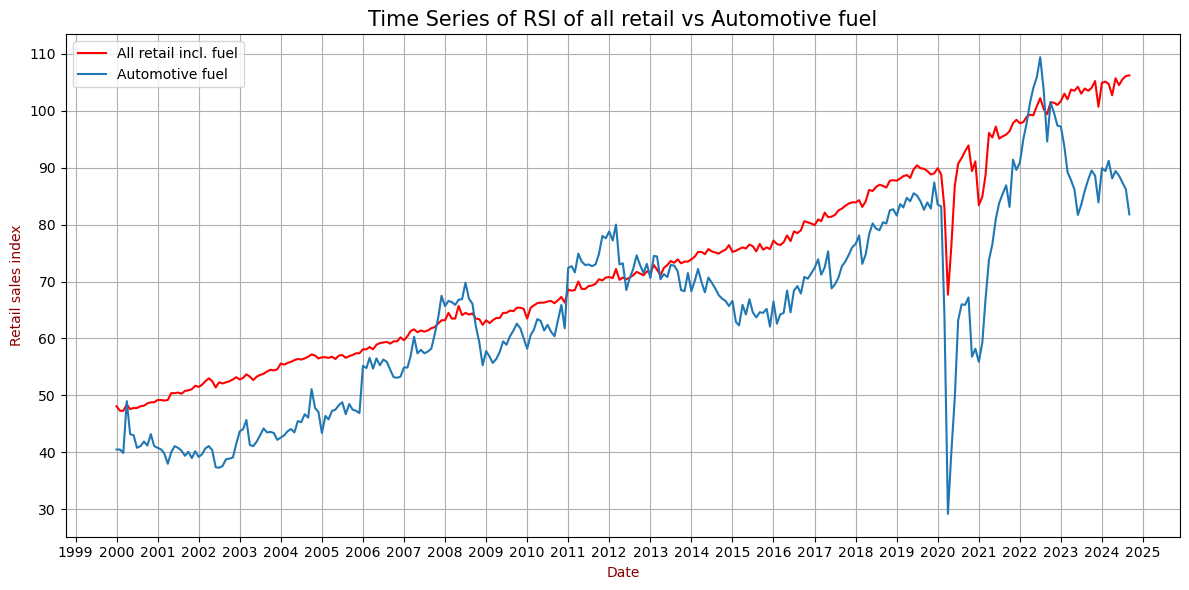

In [42]:
type1 = concat_data["All retail incl. fuel"].tolist()
#type2 = concat_data["All retail excl. fuel"].tolist()
#type3 = concat_data["food stores"].tolist()
#type4 = concat_data["non-food stores"].tolist()
#type5 = concat_data["Textile, clothing and footwear"].tolist()
#type6 = concat_data["Household goods stores"].tolist()
type7 = concat_data["Automotive fuel"].tolist()
date = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date, type1, label = "All retail incl. fuel", color='r');
#ax.plot(date, type2, label = "All retail excl. fuel");
#ax.plot(date, type3, label = "food stores");
#ax.plot(date, type4, label = "non-food stores");
#ax.plot(date, type5, label = "Textile, clothing and footwear");
#ax.plot(date, type6, label = "Household goods stores");
ax.plot(date, type7, label = "Automotive fuel");

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

#plt.xticks(rotation = 90)

plt.title("Time Series of RSI of all retail vs Automotive fuel", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Retail sales index", fontdict = font2)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

## Effect of Covid 19 on RSI

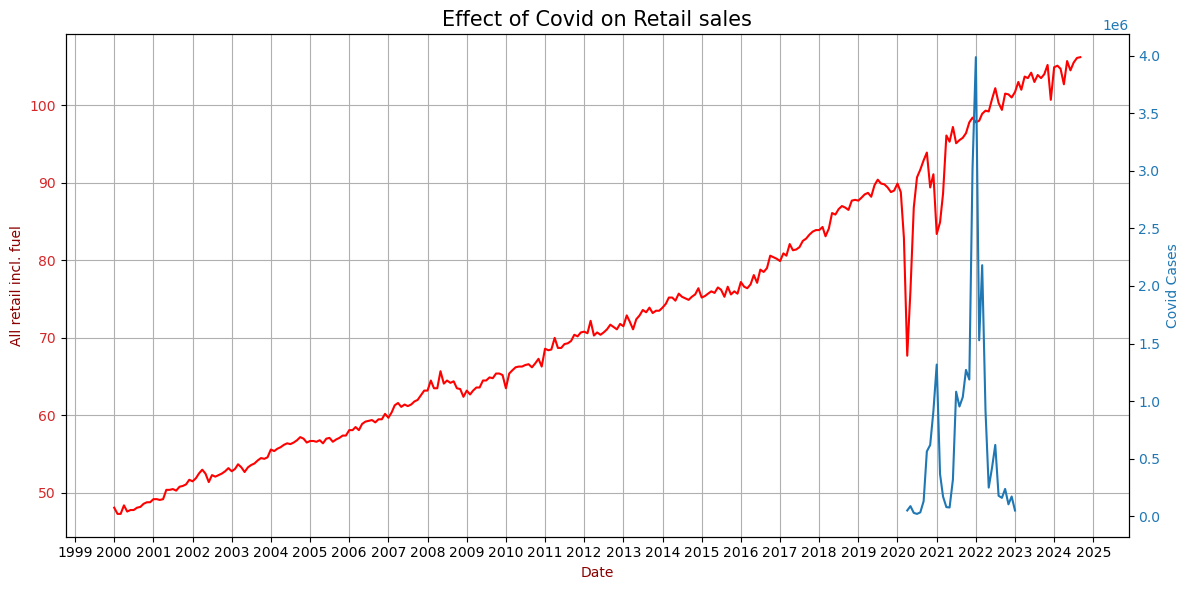

In [44]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = concat_data["Cases"].tolist()
date = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax.plot(date, type1, label = "All retail incl. fuel", color='r');
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('All retail incl. fuel', fontdict = font2)
ax.tick_params(axis='y', labelcolor=color)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid()

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Covid Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(date, type2, label = "Covid Cases")
ax2.tick_params(axis='y', labelcolor=color)

#plt.xticks(rotation = 90)

plt.title("Effect of Covid on Retail sales", fontdict = font1)
plt.tight_layout()
#plt.grid(axis = "both")
plt.show()

Correlation coefficient is  -0.6038656424370487, P-value is 0.02885036451016486


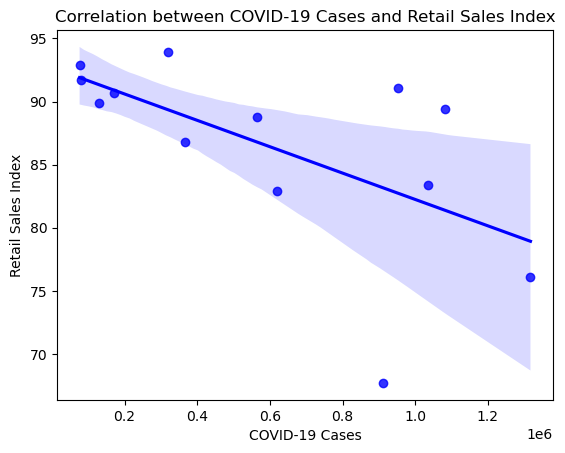

In [48]:
#Shifting the Covid Cases 8 lags back and keeping the date range between 2020 and 2021
concat_data['Lagged_Covid_Cases'] = concat_data['Cases'].shift(-8) # 8 lag shift
subset_data = concat_data.loc[202001:202101] #for time from start to end of 2020

# Calculate correlation and p-value
corr, p_value = pearsonr(subset_data['Lagged_Covid_Cases'], subset_data['All retail incl. fuel'])
print(f"Correlation coefficient is  {corr}, P-value is {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=subset_data, x='Lagged_Covid_Cases', y='All retail incl. fuel', color='blue')
plt.title("Correlation between COVID-19 Cases and Retail Sales Index")
plt.xlabel("COVID-19 Cases")
plt.ylabel("Retail Sales Index")
plt.show()

## Correlation of RSI with GDP Index

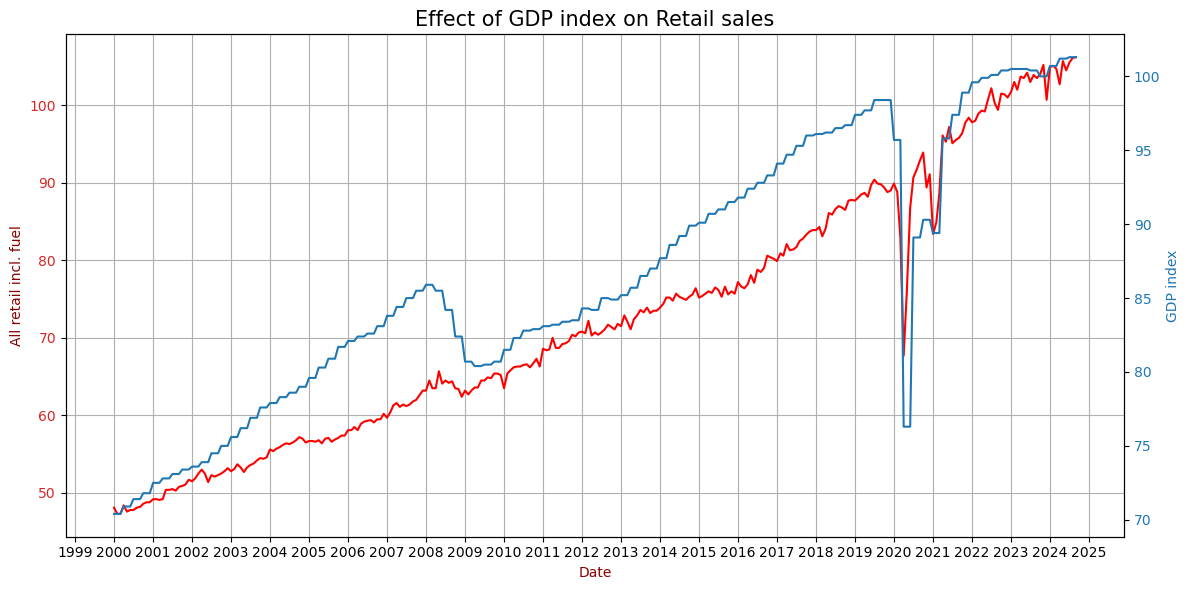

In [50]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = concat_data["GDP index"].tolist()
date = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax.plot(date, type1, label = "All retail incl. fuel", color='r');
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('All retail incl. fuel', fontdict = font2)
ax.tick_params(axis='y', labelcolor=color)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid()

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GDP index', color=color)  # we already handled the x-label with ax1
ax2.plot(date, type2, label = "GDP index")
ax2.tick_params(axis='y', labelcolor=color)

#plt.xticks(rotation = 90)

plt.title("Effect of GDP index on Retail sales", fontdict = font1)
plt.tight_layout()
#plt.grid(axis = "both")
plt.show()

Correlation coefficient is : 0.9482359203319893, and P-value is : 5.3816088943755305e-149


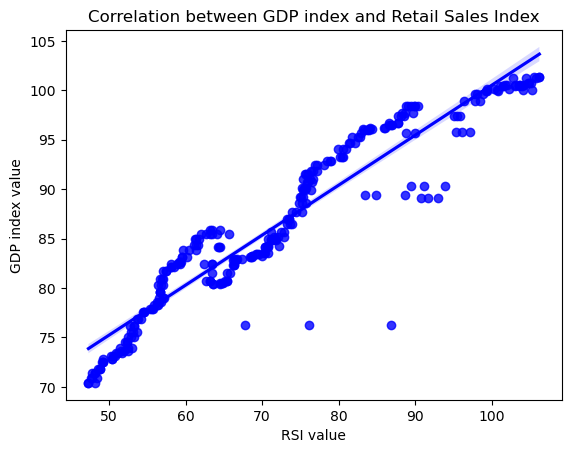

In [51]:
# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['All retail incl. fuel'], concat_data['GDP index'])
print(f"Correlation coefficient is : {corr}, and P-value is : {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel', y='GDP index', color='blue')
plt.title("Correlation between GDP index and Retail Sales Index")
plt.xlabel("RSI value")
plt.ylabel("GDP index value")
plt.show()

Correlation coefficient is : 0.5618102741672846, and P-value is : 5.0394188480998564e-26


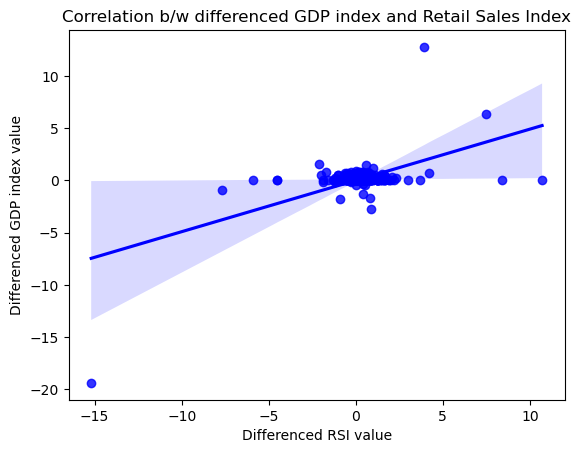

In [52]:
#Differencing to remove the existing trend that both possess
concat_data['GDP index diff'] = concat_data['GDP index'].diff()
concat_data['All retail incl. fuel diff'] = concat_data['All retail incl. fuel'].diff()

# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['All retail incl. fuel diff'].dropna(), concat_data['GDP index diff'].dropna())
print(f"Correlation coefficient is : {corr}, and P-value is : {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel diff', y='GDP index diff', color='blue')
plt.title("Correlation b/w differenced GDP index and Retail Sales Index")
plt.xlabel("Differenced RSI value")
plt.ylabel("Differenced GDP index value")
plt.show()

## Correlation of RSI with Bank Rate

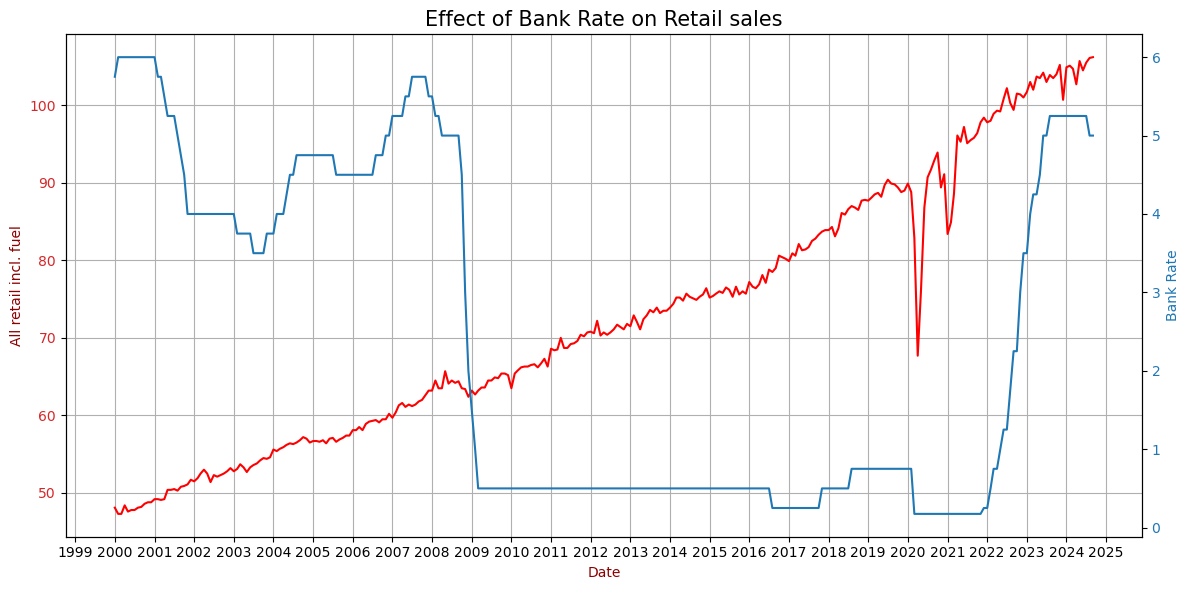

In [54]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = concat_data["Rate"].tolist()
date = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax.plot(date, type1, label = "All retail incl. fuel", color='r');
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('All retail incl. fuel', fontdict = font2)
ax.tick_params(axis='y', labelcolor=color)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid()

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Bank Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(date, type2, label = "Bank Rate")
ax2.tick_params(axis='y', labelcolor=color)

#plt.xticks(rotation = 90)

plt.title("Effect of Bank Rate on Retail sales", fontdict = font1)
plt.tight_layout()
#plt.grid(axis = "both")
plt.show()

Correlation coefficient is  -0.4231465251884154, P-value is 2.484200788828809e-14


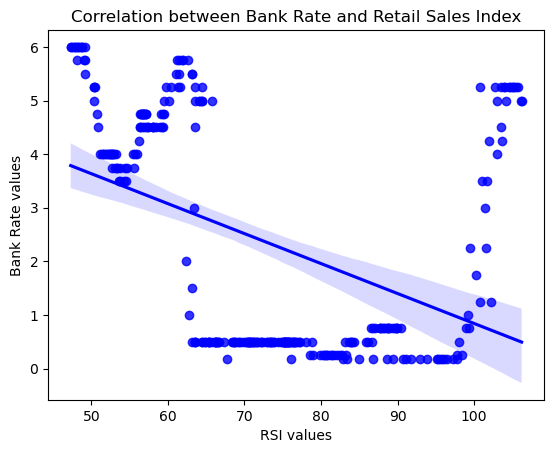

In [55]:
# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['Rate'], concat_data['All retail incl. fuel'])
print(f"Correlation coefficient is  {corr}, P-value is {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel', y='Rate', color='blue')
plt.title("Correlation between Bank Rate and Retail Sales Index")
plt.xlabel("RSI values")
plt.ylabel("Bank Rate values")
plt.show()

Correlation coefficient is  0.040390105344994355, P-value is 0.48878666613581473


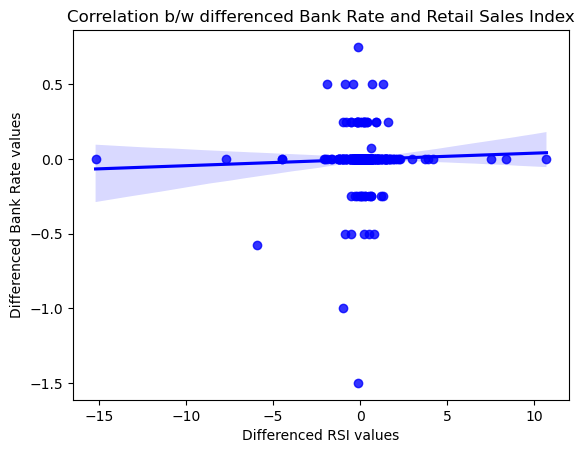

In [56]:
#Differencing to remove the trends
concat_data['Rate diff'] = concat_data['Rate'].diff()
#concat_data['All retail incl. fuel diff'] = concat_data['All retail incl. fuel'].diff()

# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['Rate diff'].dropna(), concat_data['All retail incl. fuel diff'].dropna())
print(f"Correlation coefficient is  {corr}, P-value is {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel diff', y='Rate diff', color='blue')
plt.title("Correlation b/w differenced Bank Rate and Retail Sales Index")
plt.xlabel("Differenced RSI values")
plt.ylabel("Differenced Bank Rate values")
plt.show()

## Correlation of RSI with Exchange Rate

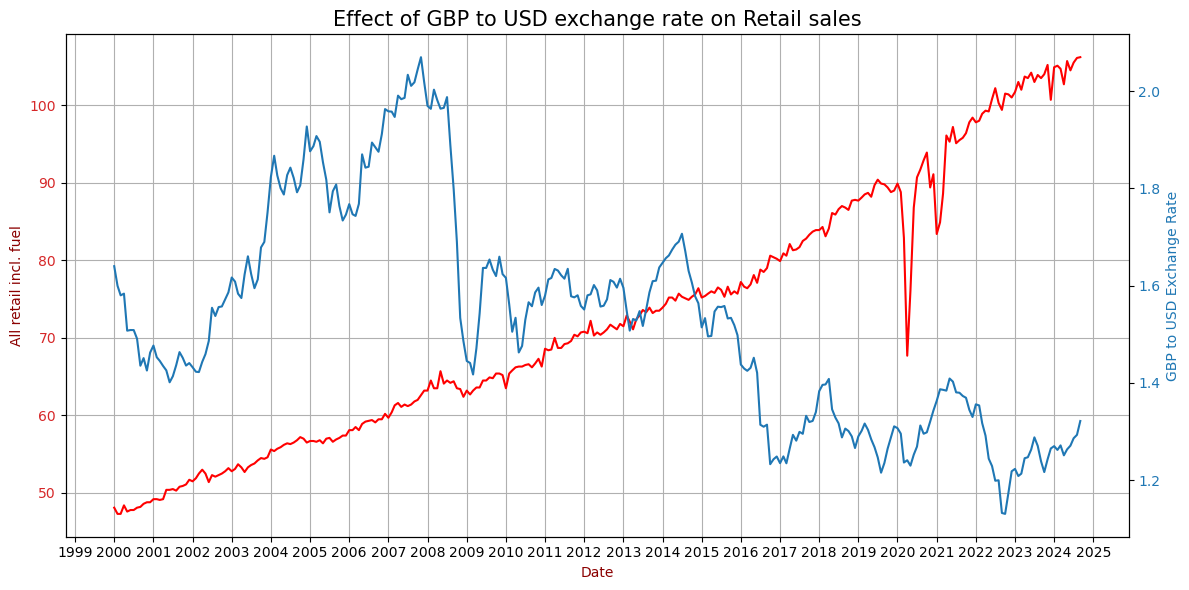

In [58]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = concat_data["Xrate"].tolist()
date = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax.plot(date, type1, label = "All retail incl. fuel", color='r');
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('All retail incl. fuel', fontdict = font2)
ax.tick_params(axis='y', labelcolor=color)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid()

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GBP to USD Exchange Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(date, type2, label = "GBP to USD Exchnage Rate")
ax2.tick_params(axis='y', labelcolor=color)

#plt.xticks(rotation = 90)

plt.title("Effect of GBP to USD exchange rate on Retail sales", fontdict = font1)
plt.tight_layout()
#plt.grid(axis = "both")
plt.show()

Correlation coefficient is  -0.6720829960942566, P-value is 2.2038978449072815e-40


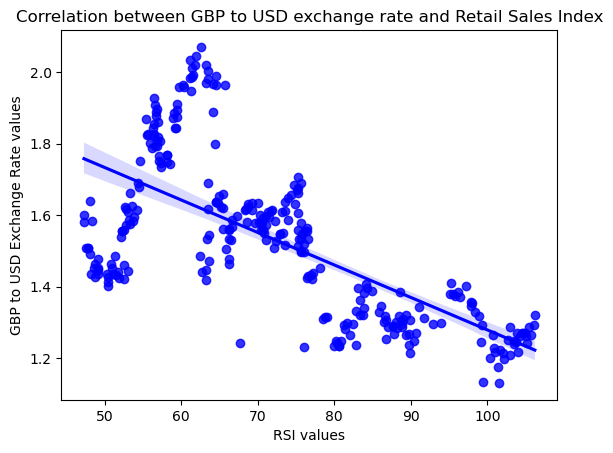

In [59]:
# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['Xrate'], concat_data['All retail incl. fuel'])
print(f"Correlation coefficient is  {corr}, P-value is {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel', y='Xrate', color='blue')
plt.title("Correlation between GBP to USD exchange rate and Retail Sales Index")
plt.xlabel("RSI values")
plt.ylabel("GBP to USD Exchange Rate values")
plt.show()

Correlation coefficient is  0.008473837828898864, P-value is 0.884572577197538


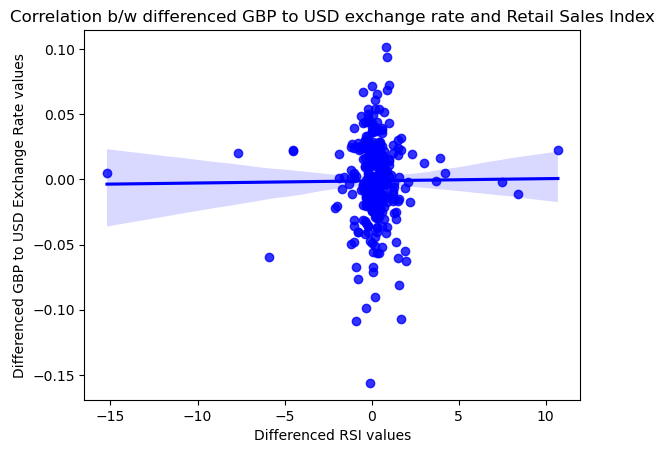

In [60]:
#Differencing to remove the trends
concat_data['Xrate diff'] = concat_data['Xrate'].diff()
#concat_data['All retail incl. fuel diff'] = concat_data['All retail incl. fuel'].diff()

# Calculate correlation and p-value
corr, p_value = pearsonr(concat_data['Xrate diff'].dropna(), concat_data['All retail incl. fuel diff'].dropna())
print(f"Correlation coefficient is  {corr}, P-value is {p_value}")

#Plotting Regression line for better understanding
sns.regplot(data=concat_data, x='All retail incl. fuel diff', y='Xrate diff', color='blue')
plt.title("Correlation b/w differenced GBP to USD exchange rate and Retail Sales Index")
plt.xlabel("Differenced RSI values")
plt.ylabel("Differenced GBP to USD Exchange Rate values")
plt.show()

# Predictive Analysis

## Linear Regression model(Ordinary least sqaure) for forecasting RSI using GDP index

In [63]:
import seaborn as sns
import statsmodels.api as sma
sns.set_theme()

# Example: Basic Statsmodels Notation
# NOTE USE OF sma.add_constant()
endog = concat_data['All retail incl. fuel']
exog = concat_data[['GDP index']]
model = sma.OLS(endog,sma.add_constant(exog)) #adding a y-intercept so that intercept is not forced to pass through origin
result = model.fit()
print (result.summary())

                              OLS Regression Results                             
Dep. Variable:     All retail incl. fuel   R-squared:                       0.899
Model:                               OLS   Adj. R-squared:                  0.899
Method:                    Least Squares   F-statistic:                     2630.
Date:                   Sun, 15 Dec 2024   Prob (F-statistic):          5.38e-149
Time:                           16:51:25   Log-Likelihood:                -912.41
No. Observations:                    297   AIC:                             1829.
Df Residuals:                        295   BIC:                             1836.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.5026 

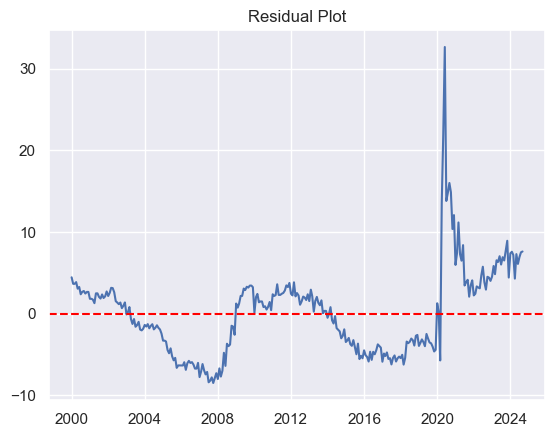

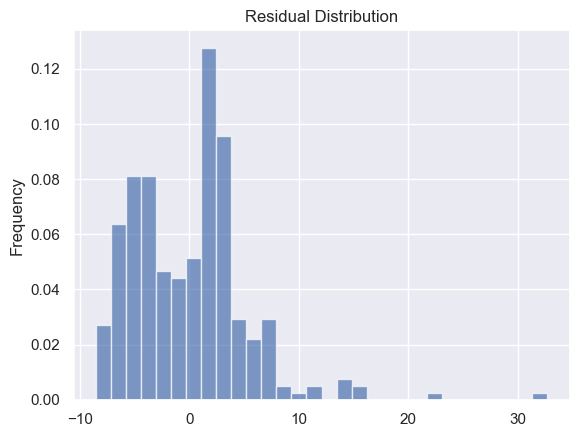

In [64]:
#Residual Analysis of the model

#Calculating Residual values 
resi = concat_data['All retail incl. fuel'] - result.fittedvalues

#plotting residuals over time
plt.plot(concat_data["Date 1"], resi)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()

#Residual values density distribution
resi.plot(kind='hist', bins=30, density=True, alpha=0.7)
plt.title("Residual Distribution")
plt.show()


In [65]:
# Predict RSI values
predict_rsi = result.get_prediction(sma.add_constant(future_gdp["Projected GDP index"]))
prediction_rsi_summary = predict_rsi.summary_frame(alpha=0.05)  # 95% CI

#Store predicted values in dataframe
future_gdp["Regression RSI values"] = prediction_rsi_summary["mean"]
future_gdp["Regression CI Lower"] = prediction_rsi_summary["obs_ci_lower"]
future_gdp["Regression CI Upper"] = prediction_rsi_summary["obs_ci_upper"]

# Display the predicted RSI values
future_gdp.head(30)

,Projected GDP index,Date 1,Regression RSI values,Regression CI Lower,Regression CI Upper
Date,,,,,
202410,100.70,2024 Oct,97.535952,87.159197,107.912707
202411,100.70,2024 Nov,97.535952,87.159197,107.912707
202412,100.70,2024 Dec,97.535952,87.159197,107.912707
202501,102.41,2025 Jan,100.576229,90.188017,110.964440
202502,102.41,2025 Feb,100.576229,90.188017,110.964440
202503,102.41,2025 Mar,100.576229,90.188017,110.964440
202504,102.92,2025 Apr,101.482978,91.091099,111.874858
202505,102.92,2025 May,101.482978,91.091099,111.874858
202506,102.92,2025 Jun,101.482978,91.091099,111.874858


/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_97315/3993761791.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()


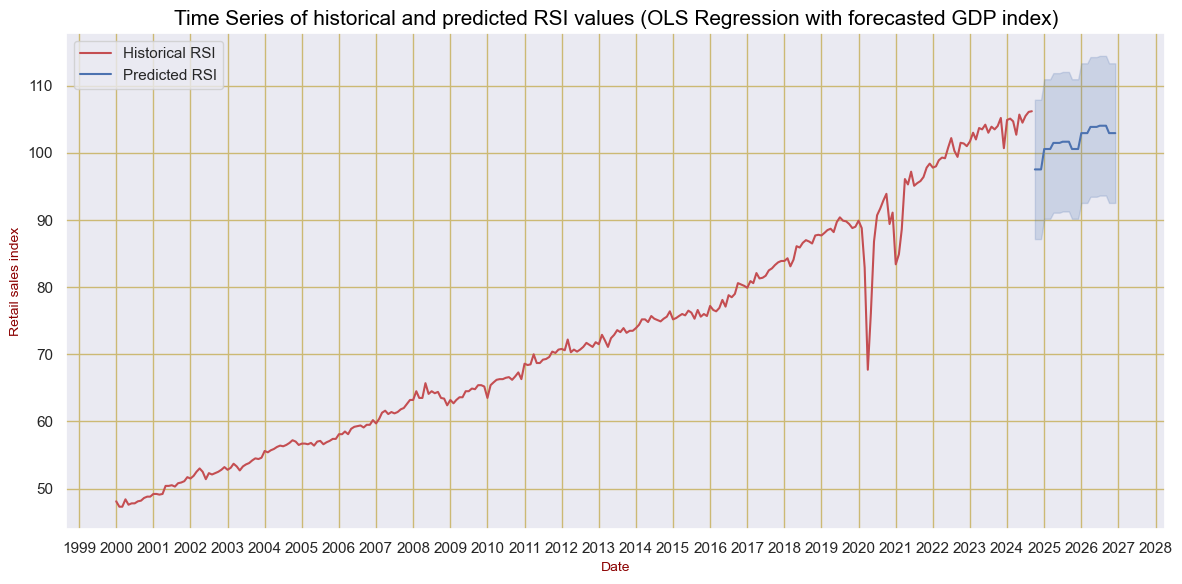

In [66]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = future_gdp["Regression RSI values"].tolist()
type3 = future_gdp["Regression CI Lower"].tolist()
type4 = future_gdp["Regression CI Upper"].tolist()

date1 = pd.to_datetime(concat_data["Date 1"]).tolist()
date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date1, type1, label = "Historical RSI", color='r');
ax.plot(date2, type2, label = "Predicted RSI");
ax.fill_between(date2, type3, type4, color='b', alpha=0.2)


# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

#plt.xticks(rotation = 90)

plt.title("Time Series of historical and predicted RSI values (OLS Regression with forecasted GDP index)", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Retail sales index", fontdict = font2)
plt.tight_layout()
plt.grid(color = "y")
plt.legend(loc = 'upper left')
plt.show()

### ARIMAX (Auto Regressive Inegrated Moving Averages with Explanatory Variable) with GDP index as exogenous variable

p-value for ADF test is : 0.9955244477845248


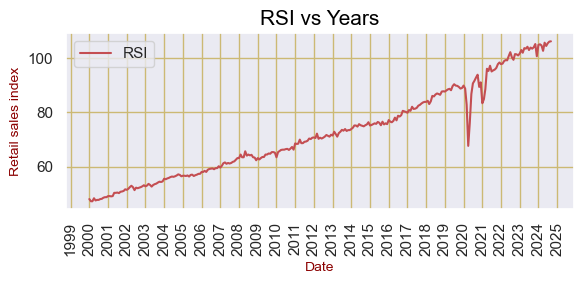

In [74]:
#Stationarity Check
#Performing ADF (Augmented Dickey Fuller Test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(concat_data["All retail incl. fuel"])
print(f'p-value for ADF test is : {adf_test[1]}')

#plotting RSI to check for Stationarity
type1 = concat_data["All retail incl. fuel"].tolist()
date1 = pd.to_datetime(concat_data["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(date1, type1, label = "RSI", color='r');

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation = 90)
plt.title("RSI vs Years", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Retail sales index", fontdict = font2)
plt.tight_layout()
plt.grid(color = "y")
plt.legend(loc = 'upper left')
plt.show()

In [75]:
#Stationarity Check
#Performing ADF (Augmented Dickey Fuller Test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(concat_data["All retail incl. fuel"].diff().dropna())
print(f'p-value for ADF test is : {adf_test[1]}')

p-value for ADF test is : 3.662240722847559e-12


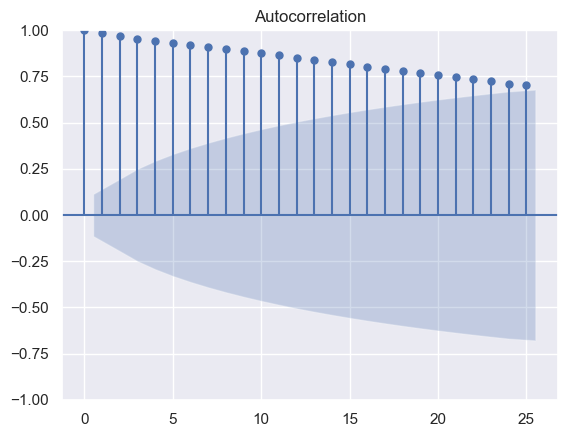

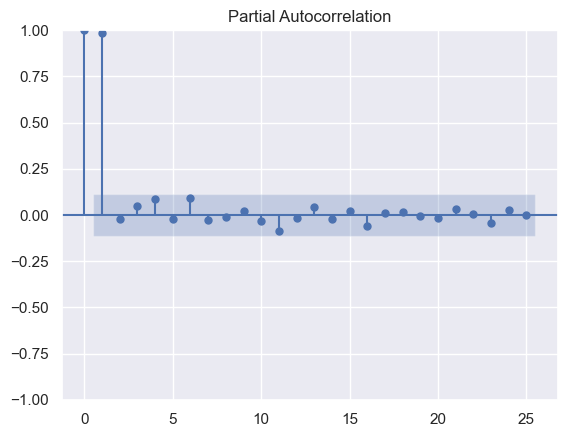

In [76]:
#ACF and PACF plot for RSI values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(concat_data["All retail incl. fuel"])
pacf = plot_pacf(concat_data["All retail incl. fuel"])

In [77]:
#Training the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Historical data
endog = concat_data['All retail incl. fuel']  # Dependent variable
exog = concat_data[['GDP index']]  # Independent variable
p = 2
d = 1
q = 0

# Fit the ARIMAX model (ARIMA orders p, d, q must be identified)
model = SARIMAX(endog, exog=exog, order=(p, d, q))  # Replace (p, d, q) with identified values
result = model.fit()

# Summary of the model
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70051D+00    |proj g|=  4.36020D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   6.565D-07   1.700D+00
  F =   1.6996872363526430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     All retail incl. fuel   No. Observations:                  297
Model:                  SARIMAX(2, 1, 0)   Log Likelihood                -504.807
Date:                   Sun, 15 Dec 2024   AIC                           1017.614
Time:                           16:51:27   BIC                           1032.376
Sample:                                0   HQIC                          1023.524
                                   - 297                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GDP index      0.6859      0.025     27.596      0.000       0.637       0.735
ar.L1         -0.1549      0.024     -6.551      0.000      -0.201      -0.109
ar.L2         -0.2238      0.029     -7.765      0.000      -0.280      -0.167
sigma2         1.7728      0.058     30.665      0.000       1.660       1.886
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              8087.47
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):              22.21   Skew:                             1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
print("Model (2, 1, 0): AIC =", result.aic, ", BIC =", result.bic)

Model (2, 1, 0): AIC = 1017.6142183934699 , BIC = 1032.375656210766


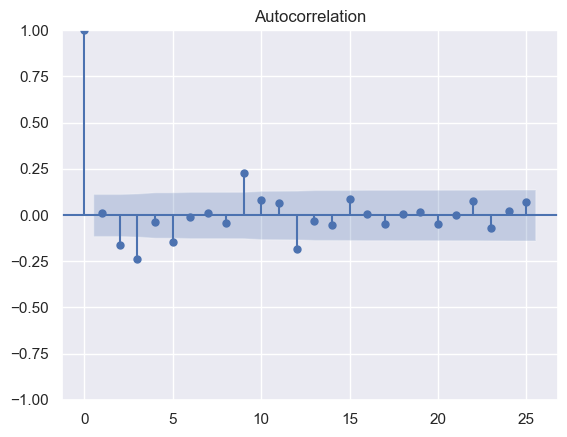

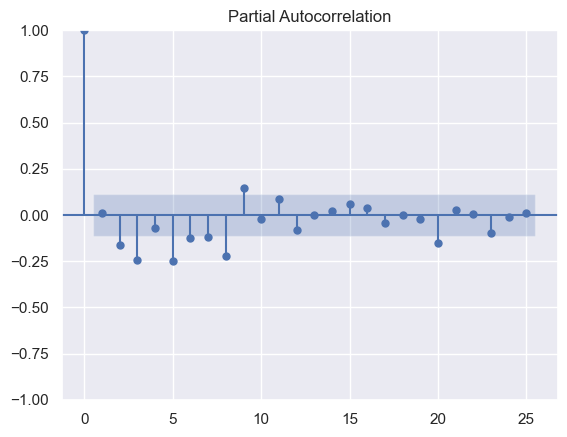

In [79]:
#ACF and PACF plot for 1 time differenced RSI values
acf_diff = plot_acf(concat_data["All retail incl. fuel"].diff().dropna())
pacf_diff = plot_pacf(concat_data["All retail incl. fuel"].diff().dropna())

In [80]:
import pmdarima as pm
auto_arima = pm.auto_arima(concat_data["All retail incl. fuel"], stepwise = True, seasonal = True)
auto_arima

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  297
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -535.560
Date:                Sun, 15 Dec 2024   AIC                           1091.120
Time:                        16:51:31   BIC                           1128.023
Sample:                             0   HQIC                          1105.895
                                - 297                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1681      0.058      2.901      0.004       0.055       0.282
ar.L1          0.0566      0.142      0.398      0.691      -0.222       0.335
ar.L2          0.5672      0.086      6.616      0.000       0.399       0.735
ar.L3         -0.0353      0.123     -0.287      0.774      -0.277       0.206
ar.L4         -0.4450      0.103     -4.337      0.000      -0.646      -0.244
ma.L1         -0.1441      0.138     -1.046      0.296      -0.414       0.126
ma.L2         -0.8323      0.092     -9.080      0.000      -1.012      -0.653
ma.L3         -0.2329      0.107     -2.181      0.029      -0.442      -0.024
ma.L4          0.6262      0.107      5.828      0.000       0.416       0.837
sigma2         2.1743      0.054     40.394      0.000       2.069       2.280
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             35143.96
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              26.09   Skew:                            -4.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
#Training the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Historical data
endog = concat_data['All retail incl. fuel']  # Dependent variable
exog = concat_data[['GDP index']]  # Independent variable
p = 4
d = 1
q = 4

# Fit the ARIMAX model (ARIMA orders p, d, q must be identified)
model = SARIMAX(endog, exog=exog, order=(p, d, q))  # Replace (p, d, q) with identified values
result = model.fit()

# Summary of the model
result.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65175D+00    |proj g|=  1.40034D-01

At iterate    5    f=  1.62458D+00    |proj g|=  3.03235D-02

At iterate   10    f=  1.61768D+00    |proj g|=  1.25452D-02

At iterate   15    f=  1.60638D+00    |proj g|=  1.22688D-01

At iterate   20    f=  1.59478D+00    |proj g|=  1.09133D-02

At iterate   25    f=  1.59337D+00    |proj g|=  1.51054D-02

At iterate   30    f=  1.59271D+00    |proj g|=  2.50939D-02

At iterate   35    f=  1.59256D+00    |proj g|=  3.20265D-03

At iterate   40    f=  1.59253D+00    |proj g|=  2.47923D-04

At iterate   45    f=  1.59253D+00    |proj g|=  4.67071D-04

At iterate   50    f=  1.59252D+00    |proj g|=  4.07731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     All retail incl. fuel   No. Observations:                  297
Model:                  SARIMAX(4, 1, 4)   Log Likelihood                -472.978
Date:                   Sun, 15 Dec 2024   AIC                            965.957
Time:                           16:51:31   BIC                           1002.860
Sample:                                0   HQIC                           980.732
                                   - 297                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GDP index      0.6394      0.027     23.671      0.000       0.586       0.692
ar.L1          0.0017      0.054      0.032      0.974      -0.104       0.107
ar.L2          1.0081      0.042     24.207      0.000       0.926       1.090
ar.L3          0.3464      0.057      6.026      0.000       0.234       0.459
ar.L4         -0.3810      0.056     -6.853      0.000      -0.490      -0.272
ma.L1         -0.2171      0.039     -5.544      0.000      -0.294      -0.140
ma.L2         -1.3473      0.032    -42.437      0.000      -1.410      -1.285
ma.L3         -0.3187      0.050     -6.366      0.000      -0.417      -0.221
ma.L4          0.9217      0.052     17.827      0.000       0.820       1.023
sigma2         1.4011      0.066     21.390      0.000       1.273       1.529
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3215.22
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              14.52   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
print("Model (4, 1, 4): AIC =", result.aic, ", BIC =", result.bic)

Model (4, 1, 4): AIC = 965.9566367184389 , BIC = 1002.8602312616795


In [84]:
# Forecast RSI
forecast = result.get_forecast(steps=len(future_gdp["Projected GDP index"]), exog=future_gdp["Projected GDP index"])
forecasted_rsi = forecast.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast.conf_int()

# Add the forecasted RSI values to the future_gdp DataFrame
future_gdp['ARIMAX RSI forecast'] = forecasted_rsi.values

# Optionally add confidence intervals for lower and upper bounds
future_gdp['ARIMAX CI Lower'] = conf_int.iloc[:, 0].values
future_gdp['ARIMAX CI Upper'] = conf_int.iloc[:, 1].values


# Display the predicted RSI values
future_gdp.head(30)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Projected GDP index,Date 1,Regression RSI values,Regression CI Lower,Regression CI Upper,ARIMAX RSI forecast,ARIMAX CI Lower,ARIMAX CI Upper
Date,,,,,,,,
202410,100.70,2024 Oct,97.535952,87.159197,107.912707,106.193708,103.872394,108.515021
202411,100.70,2024 Nov,97.535952,87.159197,107.912707,105.422095,102.472892,108.371298
202412,100.70,2024 Dec,97.535952,87.159197,107.912707,106.632457,103.507692,109.757222
202501,102.41,2025 Jan,100.576229,90.188017,110.964440,106.840313,103.659917,110.020709
202502,102.41,2025 Feb,100.576229,90.188017,110.964440,107.647934,104.348743,110.947126
202503,102.41,2025 Mar,100.576229,90.188017,110.964440,107.469749,104.151747,110.787750
202504,102.92,2025 Apr,101.482978,91.091099,111.874858,107.841869,104.431947,111.251792
202505,102.92,2025 May,101.482978,91.091099,111.874858,108.279445,104.829364,111.729526
202506,102.92,2025 Jun,101.482978,91.091099,111.874858,107.957174,104.442404,111.471944


/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_97315/2632246820.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()


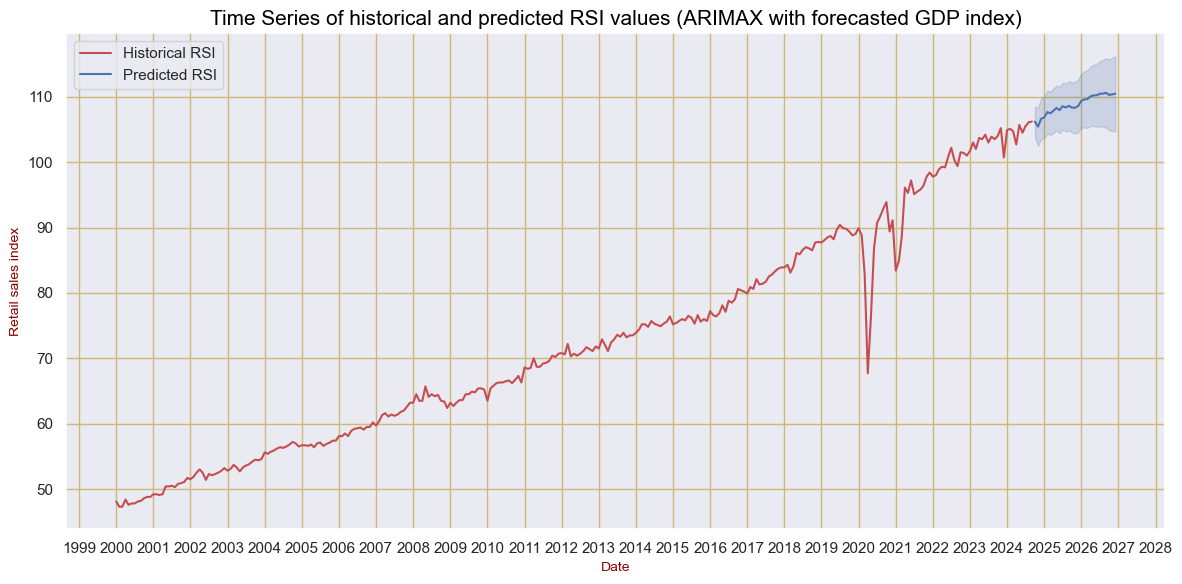

In [86]:
type1 = concat_data["All retail incl. fuel"].tolist()
type2 = future_gdp["ARIMAX RSI forecast"].tolist()
type3 = future_gdp["ARIMAX CI Lower"].tolist()
type4 = future_gdp["ARIMAX CI Upper"].tolist()

date1 = pd.to_datetime(concat_data["Date 1"]).tolist()
date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date1, type1, label = "Historical RSI", color='r');
ax.plot(date2, type2, label = "Predicted RSI");
ax.fill_between(date2, type3, type4, color='b', alpha=0.2)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

#plt.xticks(rotation = 90)
plt.title("Time Series of historical and predicted RSI values (ARIMAX with forecasted GDP index)", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Retail sales index", fontdict = font2)
plt.tight_layout()
plt.grid(color = "y")
plt.legend(loc = 'upper left')
plt.show()

/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_97315/3649989037.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()


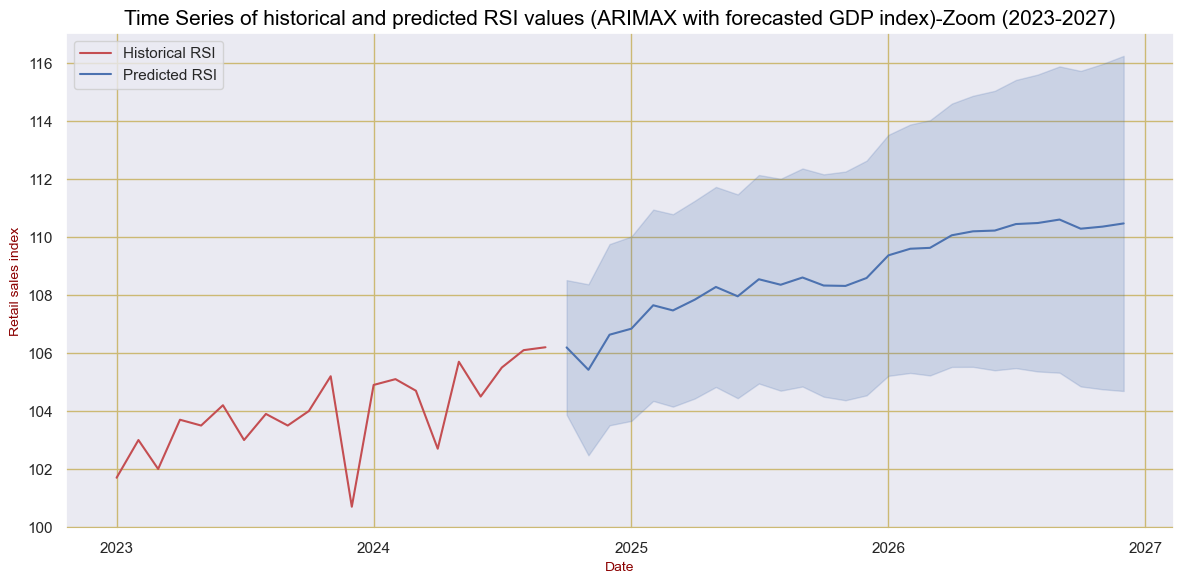

In [90]:
type1 = concat_data.loc[202301:]["All retail incl. fuel"].tolist()
type2 = future_gdp["ARIMAX RSI forecast"].tolist()
type3 = future_gdp["ARIMAX CI Lower"].tolist()
type4 = future_gdp["ARIMAX CI Upper"].tolist()

date1 = pd.to_datetime(concat_data.loc[202301:]["Date 1"]).tolist()
date2 = pd.to_datetime(future_gdp["Date 1"]).tolist()

font1 = {
    "family" : "sans serif",
    "color"  : "black",
    "size"   : 15
}
font2 = {
    "family" : "sans serif",
    "color"  : "darkred",
    "size"   : 10
}

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date1, type1, label = "Historical RSI", color='r');
ax.plot(date2, type2, label = "Predicted RSI");
ax.fill_between(date2, type3, type4, color='b', alpha=0.2)

# Format the x-axis to show only the years
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

#plt.xticks(rotation = 90)
plt.title("Time Series of historical and predicted RSI values (ARIMAX with forecasted GDP index)-Zoom (2023-2027)", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Retail sales index", fontdict = font2)
plt.tight_layout()
plt.grid(color = "y")
plt.legend(loc = 'upper left')
plt.show()